In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import time 
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import pickle




C:\Users\91916\AppData\Local\Temp\ipykernel_10284\2045642573.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'flask'

In [63]:
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [64]:
df.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [65]:
df.shape

(23486, 11)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [67]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [68]:
# Drop rows with no review
df.dropna(subset=['Review Text'], inplace=True)

In [69]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [70]:
df["Division Name"].value_counts()

Division Name
General           13365
General Petite     7837
Initmates          1426
Name: count, dtype: int64

In [71]:
df["Department Name"].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [72]:
df["Class Name"].value_counts()

Class Name
Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: count, dtype: int64

In [73]:
# Replace missing values in categorical columns with the most frequent value
df['Division Name'].fillna(df['Division Name'].mode()[0], inplace=True)
df['Department Name'].fillna(df['Department Name'].mode()[0], inplace=True)
df['Class Name'].fillna(df['Class Name'].mode()[0], inplace=True)

In [74]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [75]:
# Drop the specified columns

df.drop(columns=['Unnamed: 0', 'Clothing ID','Title'], inplace=True)

In [76]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [77]:
df.rename(columns={'Review Text': 'Text'}, inplace=True)

In [78]:
numerical_columns = [i for i in df.columns if df[i].dtype == 'int64']
categorical_columns = [i for i in df.columns if i not in  numerical_columns]

In [79]:
print(list[numerical_columns])
print(list[categorical_columns])

list[['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']]
list[['Text', 'Division Name', 'Department Name', 'Class Name']]


In [80]:
df['Recommended IND'].value_counts()

Recommended IND
1    18540
0     4101
Name: count, dtype: int64

In [81]:
# Creating a new derived variable - word count from review text
df['Text Word Count'] = df['Text'].apply(lambda x: len(str(x).split()))
df['Text Word Count']

0         8
1        62
2        98
3        22
4        36
         ..
23481    28
23482    38
23483    42
23484    86
23485    19
Name: Text Word Count, Length: 22641, dtype: int64

In [82]:
from textblob import TextBlob

In [83]:
df['polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [84]:
df['Text_len'] = df['Text'].apply(lambda x: len(x))

In [85]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

In [86]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [87]:
df['Avg_Word_Length'] = df['Text'].apply(get_avg_word_len)

In [88]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def clean_text(review):
    # I. Removing URL
    review = re.sub(r'http\S+', '', review)
    
    # II. Removing all irrelevant characters (Numbers and Punctuation)
    review = re.sub(f"[{string.punctuation}0-9]", "", review)
    
    # III. Convert all characters into lowercase
    review = review.lower()
    
    # IV. Tokenization
    tokens = review.split()
    
    # V. Removing Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # VI. Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]
    
    # VII. Remove the words having length <= 2
    tokens = [word for word in tokens if len(word) > 2]
    
    # VIII. Convert the list of tokens back to a string
    cleaned_review = ' '.join(tokens)
    
    return cleaned_review


stop_words = stopwords.words('english')




In [89]:
# Apply the clean_text function to the "Review Text" column of the DataFrame
df['Text'] = df['Text'].apply(clean_text)

In [90]:
file= open("positive-words.txt","r")

In [91]:
pos=[]
for i in file.read().split():
    pos.append(i)

In [92]:
file1= open("negative-words.txt","r",encoding='latin-1')

In [93]:
neg=[]
for i in file1.read().split():
    neg.append(i)

In [94]:
score_pos=[]
score_neg=[]
def scoring(x):
    p=0
    n1=0
    for i in x.split():
        if i in pos:
            p+=1
        if i in neg:
            n1+=-1        
    score_pos.append(p)
    score_neg.append(n1)

In [95]:
df['Text'].apply(scoring)

0        None
1        None
2        None
3        None
4        None
         ... 
23481    None
23482    None
23483    None
23484    None
23485    None
Name: Text, Length: 22641, dtype: object

In [96]:
for i in range(len(score_neg)):
    score_neg[i]=score_neg[i]*-1

In [97]:
df['Positive Score']=score_pos
df['Negative Score']=score_neg

In [98]:
df['Polarity_score'] =(df['Positive Score'] - df['Negative Score']) / (df['Positive Score'] + df['Negative Score'] + 0.000001)

In [99]:
df['Subjectivity Score'] = (df['Positive Score'] + df['Negative Score'])/ ((df['word_count']) + 0.000001)

In [100]:
df.head()

,Age,Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text Word Count,polarity,Text_len,word_count,Avg_Word_Length,Positive Score,Negative Score,Polarity_score,Subjectivity Score
0,33,absolut wonder silki sexi comfort,4,1,0,Initmates,Intimate,Intimates,8,0.633333,53,8,5.750000,2,0,1.000000,0.250000
1,34,love dress sooo pretti happen find store glad ...,5,1,4,General,Dresses,Dresses,62,0.339583,303,62,3.822581,3,0,1.000000,0.048387
2,60,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses,98,0.073675,500,98,4.112245,4,3,0.142857,0.071429
3,50,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants,22,0.550000,124,22,4.681818,6,0,1.000000,0.272727
4,47,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses,36,0.512891,192,36,4.361111,4,0,1.000000,0.111111


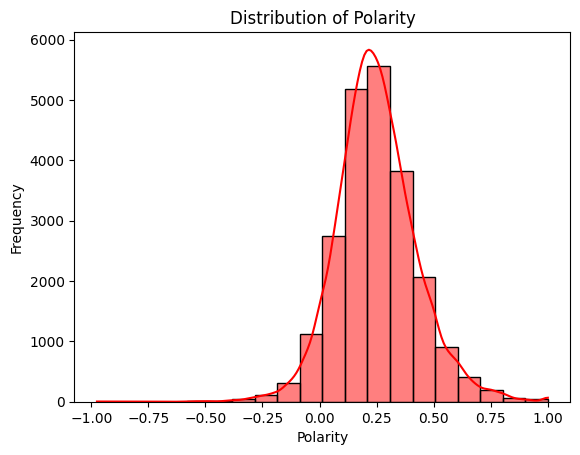

In [101]:

# Create a histogram of the 'polarity' column
sns.histplot(df['polarity'], bins=20, kde=True, color='red')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram with a kernel density estimate (KDE) overlay illustrates the distribution of polarity scores within the dataset. The majority of reviews tend to have polarity scores close to zero, indicating a neutral sentiment. However, there are noticeable peaks on either side, suggesting a mix of both positive and negative sentiments in the reviews.

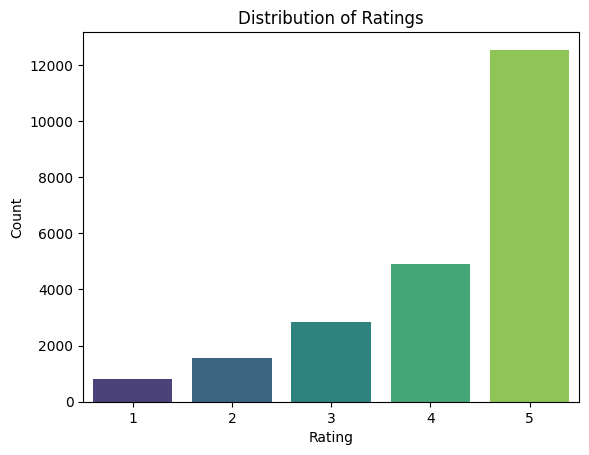

In [102]:
# Create a countplot for the 'Rating' column
sns.countplot(data=df, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

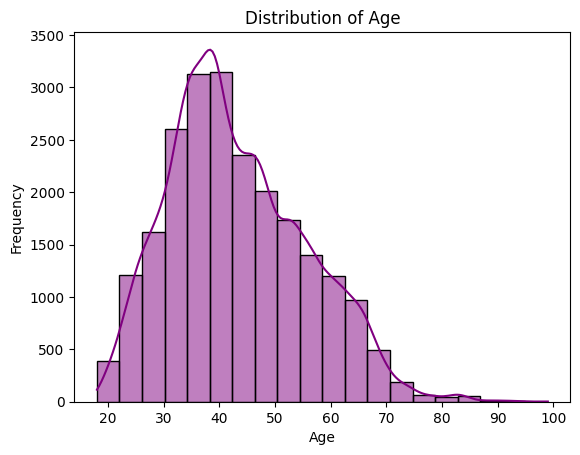

In [103]:
# Create a histogram for the 'Age' column
sns.histplot(data=df, x='Age', bins=20, kde=True, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

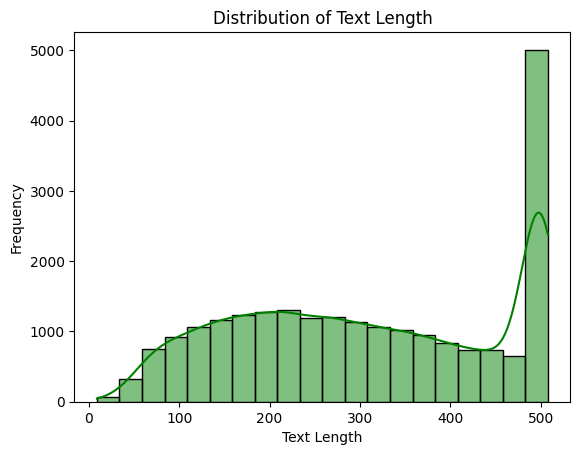

In [104]:
# Create a histogram for the 'Text_len' column
sns.histplot(data=df, x='Text_len', bins=20, kde=True, color='green')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

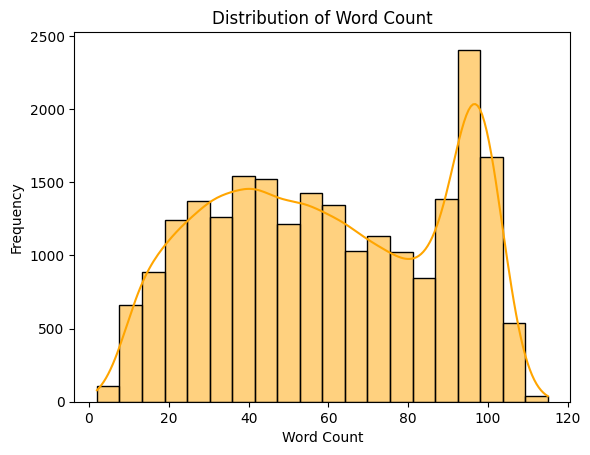

In [105]:
# Create a histogram for the 'word_count' column
sns.histplot(data=df, x='word_count', bins=20, kde=True, color='orange')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

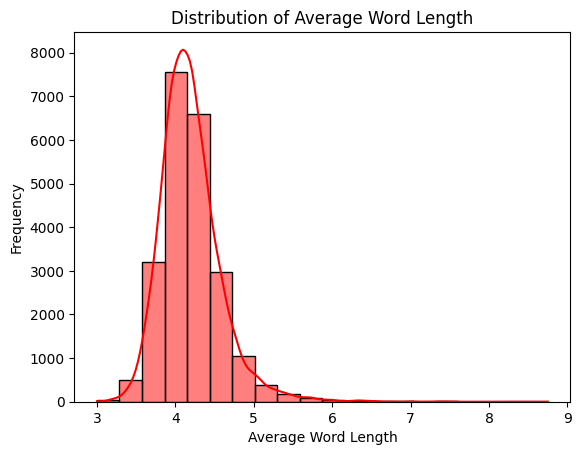

In [106]:
# Create a histogram for the 'Avg_Word_Length' column
sns.histplot(data=df, x='Avg_Word_Length', bins=20, kde=True, color='red')
plt.title('Distribution of Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

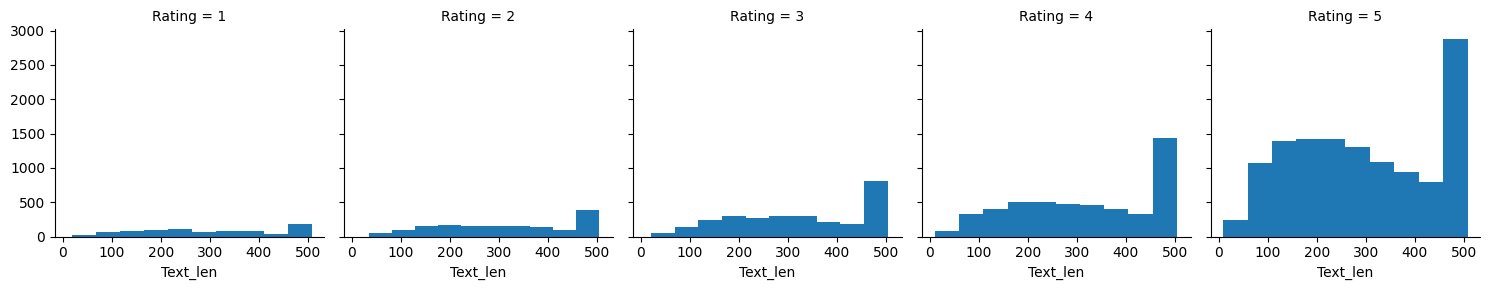

In [107]:
g = sns.FacetGrid(df,col='Rating',palette='viridis')
g.map(plt.hist,'Text_len')

In [108]:

# Create a pie chart for 'Rating'
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

fig1 = px.pie(rating_counts, names='Rating', values='Count', title='Pie Chart of Ratings')

# Create a pie chart for 'Recommended IND'
recommend_counts = df['Recommended IND'].value_counts().reset_index()
recommend_counts.columns = ['Recommended IND', 'Count']

fig2 = px.pie(recommend_counts, names='Recommended IND', values='Count', title='Pie Chart of Recommended ')

# Display the pie charts
fig1.show()
fig2.show()

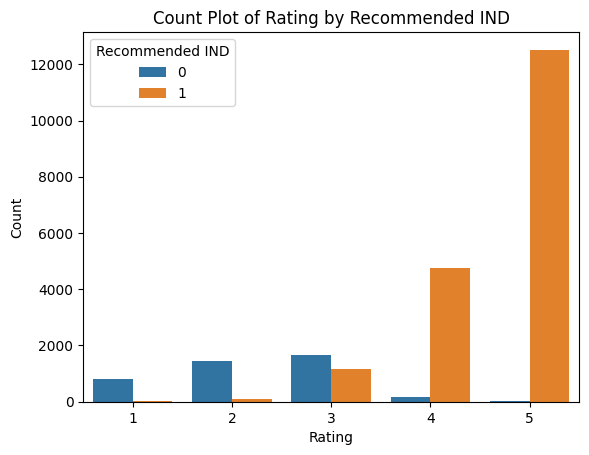

In [109]:
sns.countplot(data=df, x='Rating', hue='Recommended IND')

# Set labels and title
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Count Plot of Rating by Recommended IND")

# Show the plot
plt.show()

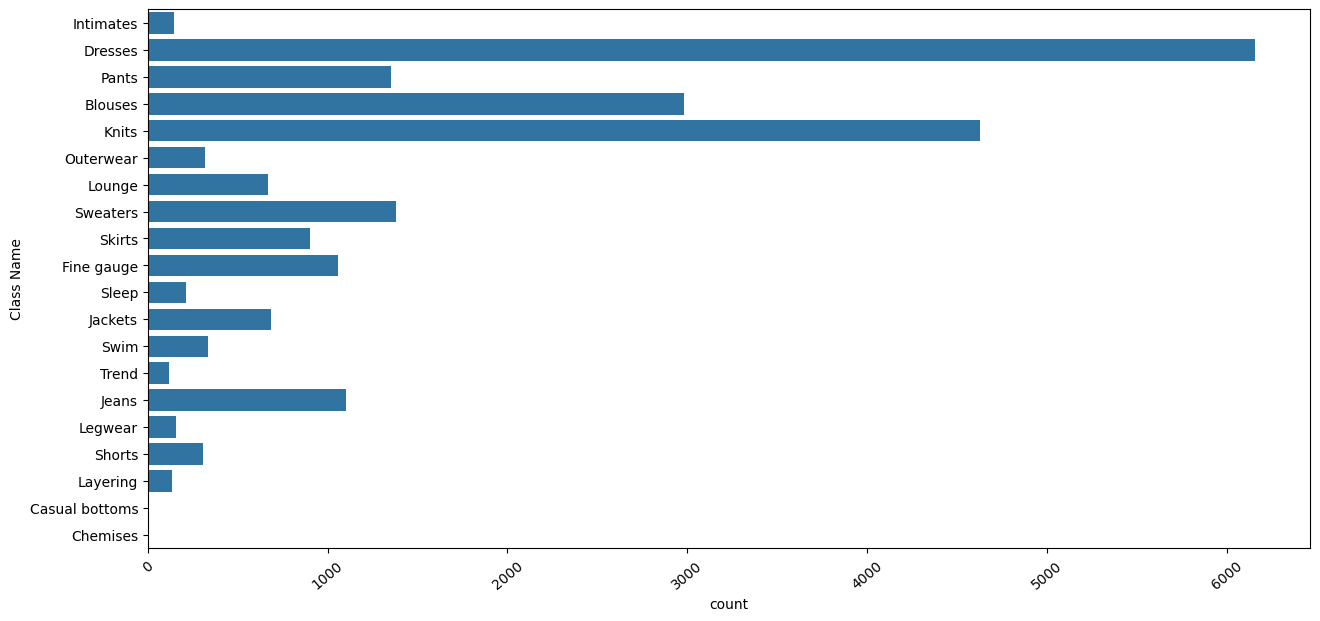

In [110]:
plt.figure(figsize = (15, 7))
sns.countplot(df['Class Name'])
plt.xticks(rotation = 40)
plt.show()

<Axes: xlabel='count', ylabel='Department Name'>

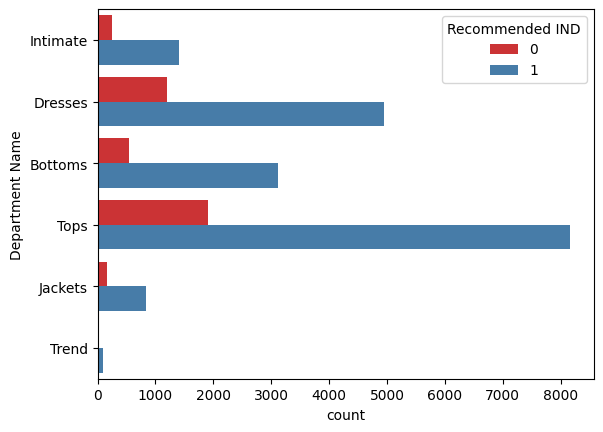

In [111]:
sns.countplot(data=df, y='Department Name', hue='Recommended IND' ,palette = "Set1")

<Axes: xlabel='count', ylabel='Division Name'>

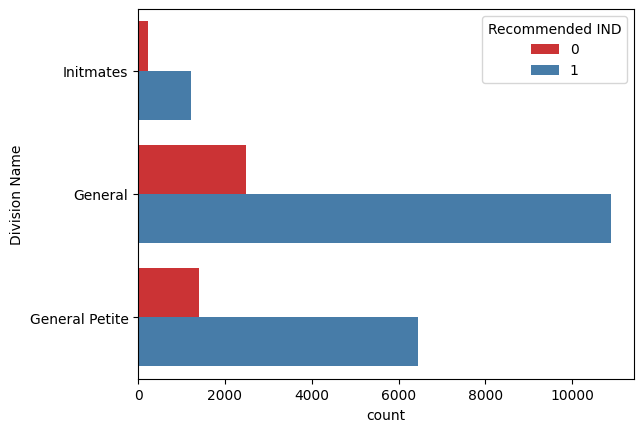

In [112]:
sns.countplot(data=df, y='Division Name', hue='Recommended IND', palette = "Set1")

[Text(0, 0, '4101'), Text(0, 0, '18540')]

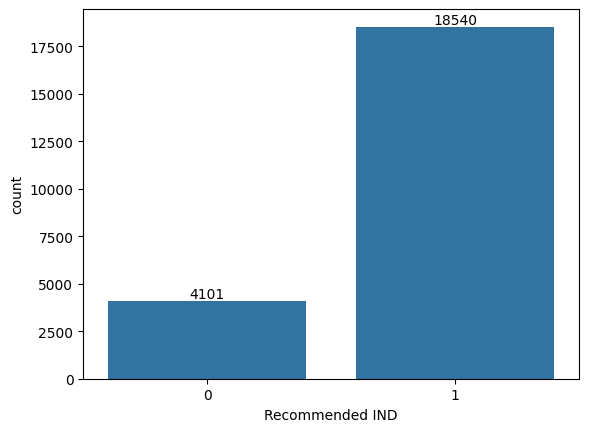

In [113]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0])

In [114]:
df.head()

,Age,Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Text Word Count,polarity,Text_len,word_count,Avg_Word_Length,Positive Score,Negative Score,Polarity_score,Subjectivity Score
0,33,absolut wonder silki sexi comfort,4,1,0,Initmates,Intimate,Intimates,8,0.633333,53,8,5.750000,2,0,1.000000,0.250000
1,34,love dress sooo pretti happen find store glad ...,5,1,4,General,Dresses,Dresses,62,0.339583,303,62,3.822581,3,0,1.000000,0.048387
2,60,high hope dress realli want work initi order p...,3,0,0,General,Dresses,Dresses,98,0.073675,500,98,4.112245,4,3,0.142857,0.071429
3,50,love love love jumpsuit fun flirti fabul everi...,5,1,0,General Petite,Bottoms,Pants,22,0.550000,124,22,4.681818,6,0,1.000000,0.272727
4,47,shirt flatter due adjust front tie perfect len...,5,1,6,General,Tops,Blouses,36,0.512891,192,36,4.361111,4,0,1.000000,0.111111


In [115]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X = tfidf_vectorizer.fit_transform(df['Text'])


In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['Rating'], test_size=0.2, random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression

rating_model = LinearRegression()
rating_model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = rating_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.7053860803012632
Mean Squared Error: 0.9311760316531826
R-squared: 0.23656883421441544


In [119]:
# Define the parameter grid for alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize Ridge Regression and Lasso Regression models
ridge_model = Ridge()


# Create a dictionary for parameter grids
param_grid = [{'alpha': alpha_values}]

# Initialize GridSearchCV for Ridge and Lasso
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5)


# Fit the models and perform grid search for Ridge and Lasso
ridge_grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}])

In [120]:
y_pred = ridge_grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5987950594347076
Mean Squared Error: 0.6105995679945947
R-squared: 0.49939568440706383


In [121]:
# # Define a parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5]
# }

# # Initialize the Gradient Boosting Regressor
# gb_regressor = GradientBoostingRegressor(random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Fit the model and perform grid search
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best model
# best_params = grid_search.best_params_
# best_gb_model = grid_search.best_estimator_

# # Evaluate the best Gradient Boosting model on the test data
# gb_predictions = best_gb_model.predict(X_test)

# # Calculate mean squared error for Gradient Boosting
# mse_gb = mean_squared_error(y_test, gb_predictions)

# # Print the best hyperparameters and mean squared error
# print("Best Hyperparameters:", best_params)
# print(f"Mean Squared Error (Gradient Boosting): {mse_gb:.4f}")

In [122]:
# Calculate R-squared (R²) score for Gradient Boosting
# r2_gb = r2_score(y_test, gb_predictions)
# print(f"R-squared (R²) Score (Gradient Boosting): {r2_gb:.4f}")

NameError: name 'gb_predictions' is not defined

In [123]:
# Initialize the Gradient Boosting Regressor with the specified hyperparameters
gb_regressor_1 = GradientBoostingRegressor(
    learning_rate=0.2,
    max_depth=4,
    n_estimators=200,
    random_state=42
)

# Fit the model to the training data
gb_regressor_1.fit(X_train, y_train)

# Predict on the test data
gb_predictions = gb_regressor_1.predict(X_test)

In [124]:

mae = mean_absolute_error(y_test, gb_predictions)
mse = mean_squared_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.6182744879723009
Mean Squared Error: 0.6634356097593445
R-squared: 0.4560776869621058


In [125]:
# Initialize the Support Vector Regression (SVR) model
svr_regressor = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Fit the SVR model to the training data
svr_regressor.fit(X_train, y_train)

# Predict on the test data
svr_predictions = svr_regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, svr_predictions)
mse = mean_squared_error(y_test, svr_predictions)
r2 = r2_score(y_test, svr_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.5847026463736399
Mean Squared Error: 0.6308882594061854
R-squared: 0.4827618592117182


In [126]:
# Assuming new_review_text is the text of the new review
new_review_text = "i will not recommend anyone to buy this dresss."

# Preprocess the new review text
new_review_tokens = nltk.word_tokenize(new_review_text.lower())
new_review_tokens = [word for word in new_review_tokens if word.isalnum()]
new_review_tokens = [word for word in new_review_tokens if word not in stop_words]
new_review_text = ' '.join(new_review_tokens)

# Vectorize the new review text
new_review_vector = tfidf_vectorizer.transform([new_review_text])

# Make rating prediction
rating_prediction = rating_model.predict(new_review_vector)

# Clamp the predicted rating to the range of 1 to 5
predicted_rating_clamped = max(1, min(5, rating_prediction[0]))

print(f"Predicted Rating:{predicted_rating_clamped:.2f}")

Predicted Rating:4.24


In [127]:
import pickle

with open('rating_model.pkl', 'wb') as file:
    pickle.dump(rating_model, file)

In [128]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)